<a href="https://colab.research.google.com/github/keijoss/thesis_backend/blob/main/female.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.DataFrame([

    {"Quiz ID": "Quiz 2", "Question ID": "F1", "Question": "What is the function of the uterus in the female reproductive system?",
     "Options": "a. Produces eggs, b. Houses and nourishes a developing fetus, c. Produces hormones, d. Transports eggs",
     "Correct Answer": "b", "Topic": "Uterus"},
    {"Quiz ID": "Quiz 2", "Question ID": "F2", "Question": "Which part of the female reproductive system connects the ovary to the uterus?",
     "Options": "a. Cervix, b. Fallopian tube, c. Vagina, d. Uterus",
     "Correct Answer": "b", "Topic": "Fallopian Tube"},
    {"Quiz ID": "Quiz 2", "Question ID": "F3", "Question": "What is the role of the cervix?",
     "Options": "a. To produce eggs, b. To act as the opening to the uterus, c. To carry eggs, d. To release hormones",
     "Correct Answer": "b", "Topic": "Cervix"},
    {"Quiz ID": "Quiz 2", "Question ID": "F4", "Question": "What is the main function of the ovaries?",
     "Options": "a. To produce and release eggs, b. To support a developing fetus, c. To store sperm, d. To connect to the uterus",
     "Correct Answer": "a", "Topic": "Ovary"},
    {"Quiz ID": "Quiz 2", "Question ID": "F5", "Question": "What is the vagina's primary function?",
     "Options": "a. Acts as the birth canal, b. Stores eggs, c. Produces hormones, d. Transports sperm to the fallopian tube",
     "Correct Answer": "a", "Topic": "Vagina"},
    {"Quiz ID": "Quiz 2", "Question ID": "F6", "Question": "Where does fertilization usually occur in the female reproductive system?",
     "Options": "a. Uterus, b. Vagina, c. Fallopian tube, d. Cervix",
     "Correct Answer": "c", "Topic": "Fallopian Tube"},
    {"Quiz ID": "Quiz 2", "Question ID": "F7", "Question": "Which organ produces female sex hormones such as estrogen and progesterone?",
     "Options": "a. Uterus, b. Cervix, c. Ovaries, d. Fallopian tube",
     "Correct Answer": "c", "Topic": "Ovary"},
    {"Quiz ID": "Quiz 2", "Question ID": "F8", "Question": "What is the lower, narrow part of the uterus called?",
     "Options": "a. Cervix, b. Fallopian tube, c. Vagina, d. Ovary",
     "Correct Answer": "a", "Topic": "Cervix"},
    {"Quiz ID": "Quiz 2", "Question ID": "F9", "Question": "What is the purpose of the fallopian tubes?",
     "Options": "a. To connect the uterus and the cervix, b. To carry eggs from the ovaries to the uterus, c. To produce eggs, d. To act as a barrier for sperm",
     "Correct Answer": "b", "Topic": "Fallopian Tube"},
    {"Quiz ID": "Quiz 2", "Question ID": "F10", "Question": "What happens in the uterus during pregnancy?",
     "Options": "a. Hormones are produced, b. The fertilized egg implants and develops into a fetus, c. Eggs are released, d. Fertilization occurs",
     "Correct Answer": "b", "Topic": "Uterus"}
])

# Student answers example
student_answers = [

    {"Question ID": "F1", "Answer": "b"},
    {"Question ID": "F2", "Answer": "b"},
    {"Question ID": "F3", "Answer": "b"},
    {"Question ID": "F4", "Answer": "a"},
    {"Question ID": "F5", "Answer": "a"},
    {"Question ID": "F6", "Answer": "c"},
    {"Question ID": "F7", "Answer": "c"},
    {"Question ID": "F8", "Answer": "a"},
    {"Question ID": "F9", "Answer": "b"},
    {"Question ID": "F10", "Answer": "a"} #wrong
    # Add all answers here
]

# Train model using quiz data

# Add 'User Answer' and 'Is Correct' columns
answers_df = pd.DataFrame(student_answers)
data = data.merge(answers_df, on="Question ID", how="left")
data["Is Correct"] = (data["Answer"] == data["Correct Answer"]).astype(int)

# Prepare data for training
X = pd.get_dummies(data[["Quiz ID", "Topic", "Answer"]])
y = data["Is Correct"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model predictions
data["Predicted"] = model.predict(X)

# Calculate performance per topic
performance = data.groupby("Topic")["Is Correct"].mean().reset_index()
performance.columns = ["Topic", "Accuracy"]

# Suggest topics for review and ignore every topic that has 0 accuracy

threshold = 0.7  # Accuracy threshold
to_review = performance[performance["Accuracy"] < threshold]

# # Set threshold
# threshold = 0.7  # Accuracy threshold

# # Filter out topics with 0 accuracy
# filtered_performance = performance[performance["Accuracy"] > 0]

# # Suggest topics for review
# to_review = filtered_performance[filtered_performance["Accuracy"] < threshold]

# Display recommendations
print("Topics to Review:")
print(to_review)

# Model accuracy
accuracy = (data["Predicted"] == data["Is Correct"]).mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Topics to Review:
    Topic  Accuracy
3  Uterus       0.5
Model Accuracy: 100.00%


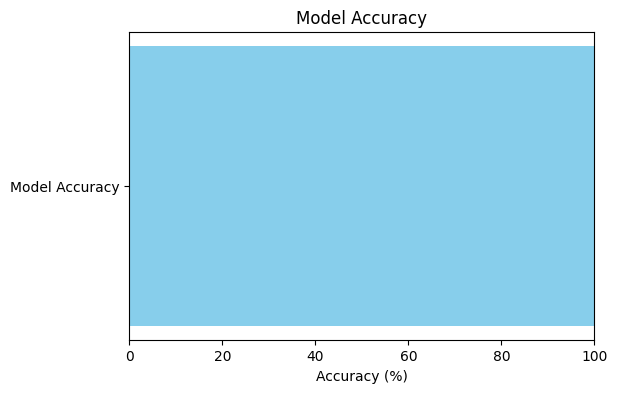

In [ ]:
import matplotlib.pyplot as plt

# Model accuracy
accuracy = (data["Predicted"] == data["Is Correct"]).mean()
accuracy_percentage = accuracy * 100

# Plotting the accuracy
plt.figure(figsize=(6, 4))
plt.barh(['Model Accuracy'], [accuracy_percentage], color='skyblue')
plt.xlim(0, 100)  # Set x-axis range from 0 to 100
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.show()

Model Accuracy: 100.00%


<ipython-input-9-a8418bfed02c>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  topic_accuracy = data.groupby('Topic').apply(lambda x: (x['Predicted'] == x['Is Correct']).mean())


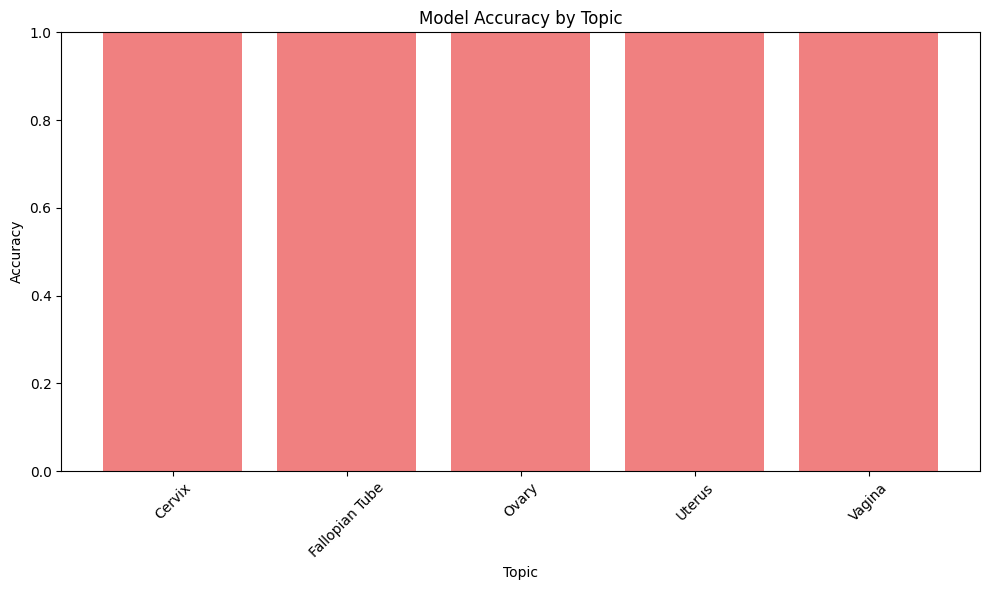

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is the correct DataFrame containing your predictions and correct labels
# Calculate accuracy per topic
topic_accuracy = data.groupby('Topic').apply(lambda x: (x['Predicted'] == x['Is Correct']).mean())

# Print the overall model accuracy
accuracy = (data['Predicted'] == data['Is Correct']).mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualize accuracy by topic
plt.figure(figsize=(10, 6))
plt.bar(topic_accuracy.index, topic_accuracy.values, color='lightcoral')

plt.xlabel('Topic')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Topic')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pickle

# Will be the filename of the trained model
filename = 'female_quiz_ai.pkl'

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(data, file)

print(f"Model saved as {filename}")
import pickle

# Will be the filename of the trained model
filename = 'female_quiz_ai.pkl'

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(data, file)

print(f"Model saved as {filename}")


Model saved as female_quiz_ai.pkl
Model saved as female_quiz_ai.pkl


In [ ]:
import pickle

# Will be the filename of the trained model
filename = 'female_quiz_ai.pkl'

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(data, file)

print(f"Model saved as {filename}")


Model saved as female_quiz_ai.pkl


In [ ]:
from google.colab import files

# Download the model file
files.download('female_quiz_ai.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>